## Q2:Salary_hike -> Build a prediction model for Salary_hike

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
##Reading the file

salary_data=pd.read_csv('.csv')

In [3]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:>

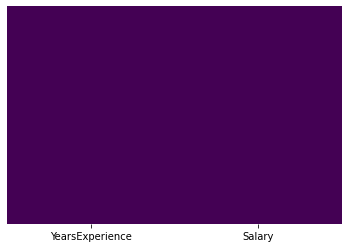

In [7]:
sns.heatmap(salary_data.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [8]:
## Checking for Duplicates

salary_data[salary_data.duplicated()].shape
salary_data.shape

(0, 2)

(30, 2)

In [9]:
salary_data.drop_duplicates()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

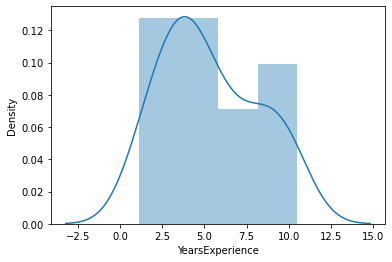

In [10]:
sns.distplot(salary_data['YearsExperience'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

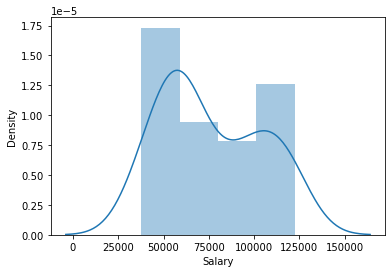

In [11]:
sns.distplot(salary_data['Salary'])

In [12]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

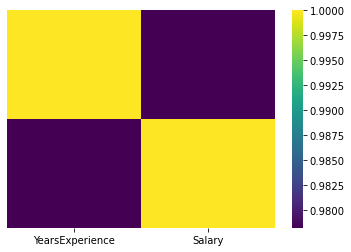

In [13]:
sns.heatmap(salary_data.corr(),cmap='viridis',cbar=True,yticklabels=False)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

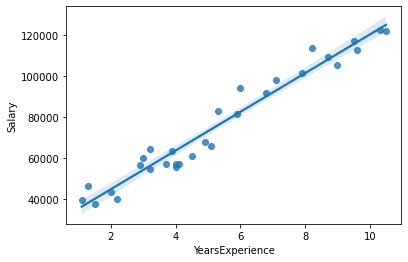

In [14]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'],
           data=salary_data)

In [15]:
## Finding the Best Fit regression Model

import statsmodels.formula.api as smf


In [16]:
## Problem Statement-->Salary_hike -> Build a prediction model for Salary_hike

## So Salary Hike->y variable and YearsExperience-->x variable

## Model Building

In [17]:
model= smf.ols("Salary~YearsExperience",data=salary_data).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        10:02:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [19]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [20]:
## B0= intercept=25792.200199,B1=proportion Change=9449.962321

In [21]:
(model.pvalues, model.tvalues)

(Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64,
 Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64)

In [22]:
## R-Squared and R-Squared Adjusted

In [23]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

## Model Prediction

In [24]:
## Manual Prediction (B0+B1(x))

salary_1=model.params[0] + (model.params[1] * 5) ##Let x=5
salary_1

73042.01180594409

In [25]:
## Automated Predicted

new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [26]:
dt1=pd.DataFrame(new_data,columns=['YearsExperience'])
dt1

,YearsExperience
0,5
1,8


In [27]:
model.predict(dt1)

0     73042.011806
1    101391.898770
dtype: float64

In [28]:
## This Signifies that if years of Experience increase, Salary also increases 
## and above predicted Data says that if 5 years of Experience then Salary
## would be=73042.01 

## Log Transformation

In [29]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
X=salary_data.iloc[:,0]
Y=salary_data.iloc[:,1]

X.head()
Y.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [31]:
df_log=salary_data.copy()

In [32]:
df_log['log_Salary']=np.log(salary_data['Salary'])
df_log['log_yoExp']=np.log(salary_data['YearsExperience'])

In [33]:
df_log.head()

,YearsExperience,Salary,log_Salary,log_yoExp
0,1.1,39343.0,10.580073,0.095310
1,1.3,46205.0,10.740843,0.262364
2,1.5,37731.0,10.538237,0.405465
3,2.0,43525.0,10.681091,0.693147
4,2.2,39891.0,10.593906,0.788457


In [34]:
model_log=smf.ols('log_Salary~log_yoExp',data=df_log).fit()

In [35]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           7.40e-16
Time:                        10:02:56   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_yoExp      0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
d1={'Models':['Model','Log_tranformed_Model'],'Values':[model.rsquared,model_log.rsquared]}
model_accuracy_tb=pd.DataFrame(d1)

model_accuracy_tb

,Models,Values
0,Model,0.956957
1,Log_tranformed_Model,0.905215


In [37]:
## Here we can see there is a decrease in R squared values when Log 
## Transformation is done , so we reject Log Transformation in this case and 
## Accept out true Model R-Squared value=0.956